Pandas Challenges

Topic: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: 10 minutes to pandas

Data: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: 2013_movies.csv

In [350]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [351]:
# Read the csv file

df = pd.read_csv('https://raw.githubusercontent.com/tlids/chi17_ds1/master/challenges/challenges_data/2013_movies.csv?token=AVeEZIA9Af8MClkO7WTGQon_9VePttlsks5Yk6p3wA%3D%3D')

In [352]:
# Check the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [353]:
# Read the first few rows

df.head()

Title       Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000.0           424668047   
1                       Iron Man 3  200000000.0           409013994   
2                           Frozen  150000000.0           400738009   
3                  Despicable Me 2   76000000.0           368061265   
4                     Man of Steel  225000000.0           291045518   

                    Director Rating  Runtime          ReleaseDate  
0           Francis Lawrence  PG-13      146  2013-11-22 00:00:00  
1                Shane Black  PG-13      129  2013-05-03 00:00:00  
2     Chris BuckJennifer Lee     PG      108  2013-11-22 00:00:00  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03 00:00:00  
4                Zack Snyder  PG-13      143  2013-06-14 00:00:00

In [354]:
# Convert release date to date type

from datetime import datetime

df['ReleaseDate'] = df['ReleaseDate'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.5+ KB


In [356]:
df.head()

Title       Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000.0           424668047   
1                       Iron Man 3  200000000.0           409013994   
2                           Frozen  150000000.0           400738009   
3                  Despicable Me 2   76000000.0           368061265   
4                     Man of Steel  225000000.0           291045518   

                    Director Rating  Runtime ReleaseDate  
0           Francis Lawrence  PG-13      146  2013-11-22  
1                Shane Black  PG-13      129  2013-05-03  
2     Chris BuckJennifer Lee     PG      108  2013-11-22  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03  
4                Zack Snyder  PG-13      143  2013-06-14

In [357]:
# Add a column for release month

df['ReleaseMonth'] = df.ReleaseDate.map(lambda x: x.month)

In [358]:
# Check data types again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
ReleaseMonth          100 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 6.3+ KB


In [359]:
df.head()

Title       Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000.0           424668047   
1                       Iron Man 3  200000000.0           409013994   
2                           Frozen  150000000.0           400738009   
3                  Despicable Me 2   76000000.0           368061265   
4                     Man of Steel  225000000.0           291045518   

                    Director Rating  Runtime ReleaseDate  ReleaseMonth  
0           Francis Lawrence  PG-13      146  2013-11-22            11  
1                Shane Black  PG-13      129  2013-05-03             5  
2     Chris BuckJennifer Lee     PG      108  2013-11-22            11  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03             7  
4                Zack Snyder  PG-13      143  2013-06-14             6

Challenge 1

Plot domestic total gross over time.

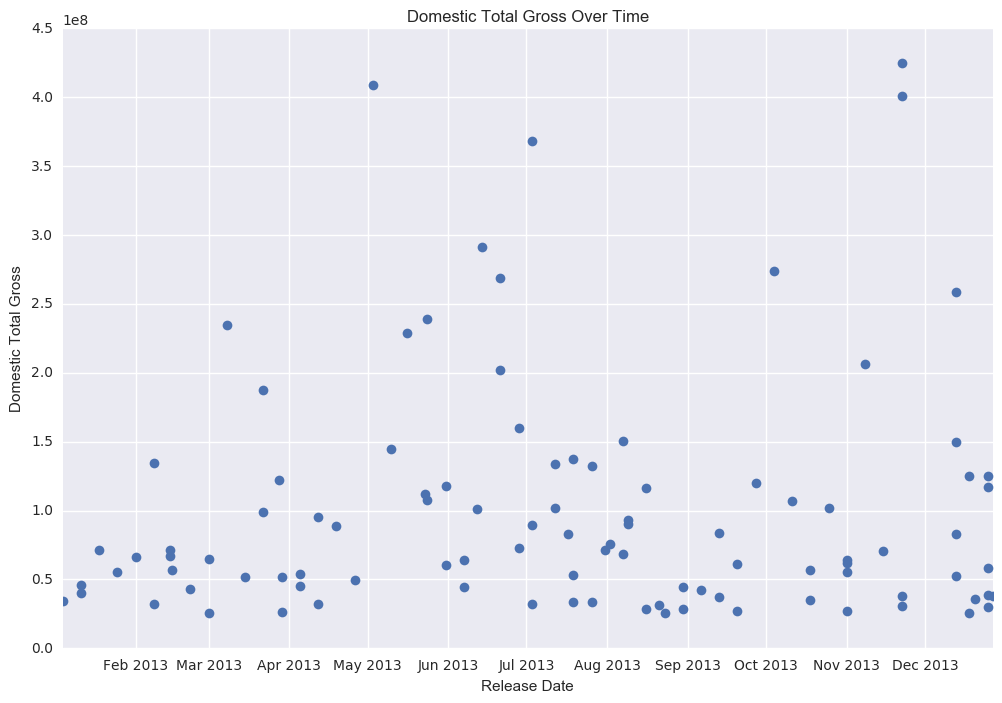

In [360]:
# Plot the gross over time

plt.figure(figsize=(12,8))
plt.plot_date(df.ReleaseDate, df.DomesticTotalGross)
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')
plt.title('Domestic Total Gross Over Time')

Challenge 2

Plot runtime vs. domestic total gross.

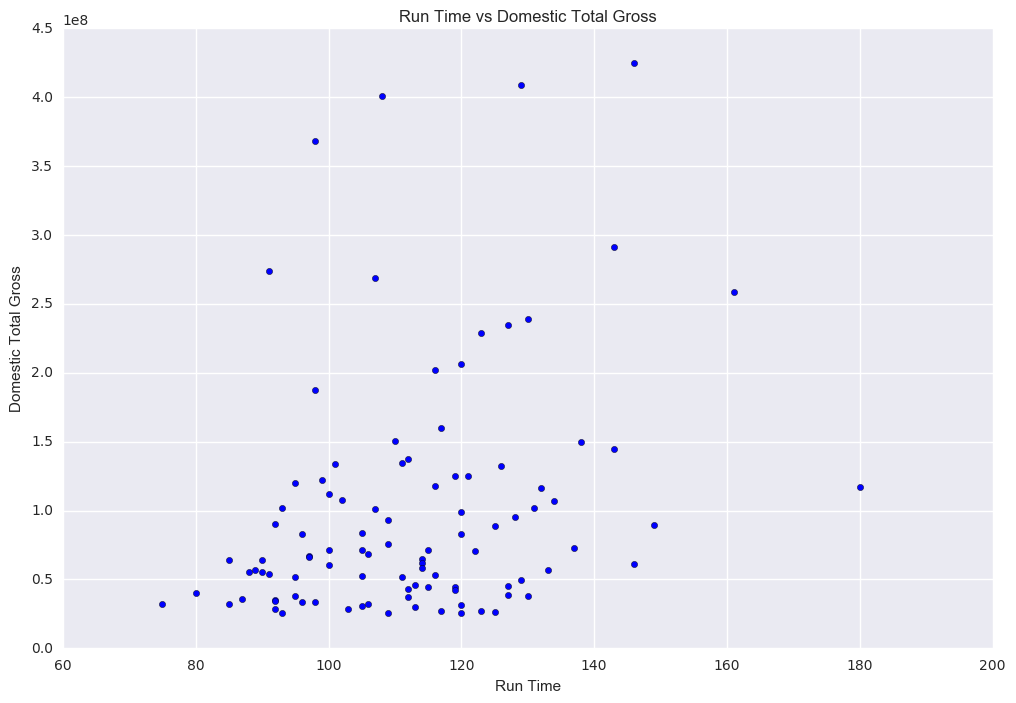

In [361]:
# Plot domestic total gross against runtime

plt.figure(figsize=(12,8))
plt.scatter(df.Runtime, df.DomesticTotalGross)
plt.xlabel('Run Time')
plt.ylabel('Domestic Total Gross')
plt.title('Run Time vs Domestic Total Gross')

Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [362]:
# Group the data by rating

df.groupby('Rating').mean()

Budget  DomesticTotalGross     Runtime  ReleaseMonth
Rating                                                            
G                NaN        2.684928e+08  107.000000      6.000000
PG      9.393333e+07        1.311357e+08   99.933333      7.533333
PG-13   9.660976e+07        1.114498e+08  117.510638      7.000000
R       3.886364e+07        6.989243e+07  110.729730      6.810811

In [363]:
# Drop budget column

group_rating = df.groupby('Rating').mean()
group_rating = group_rating.drop('Budget',1)
group_rating

DomesticTotalGross     Runtime  ReleaseMonth
Rating                                              
G             2.684928e+08  107.000000      6.000000
PG            1.311357e+08   99.933333      7.533333
PG-13         1.114498e+08  117.510638      7.000000
R             6.989243e+07  110.729730      6.810811

Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.


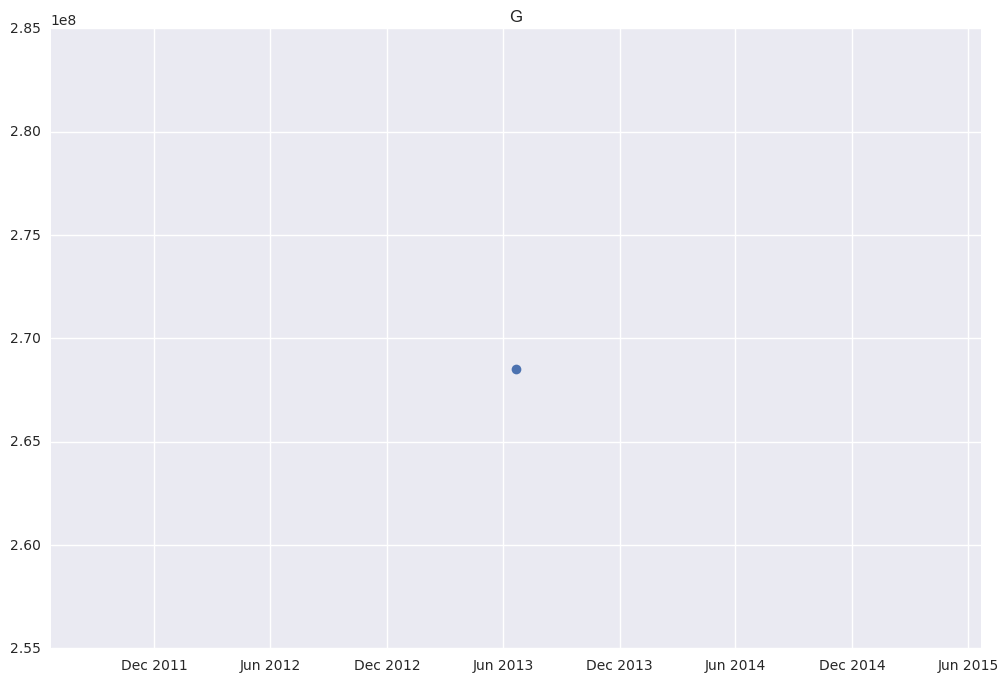

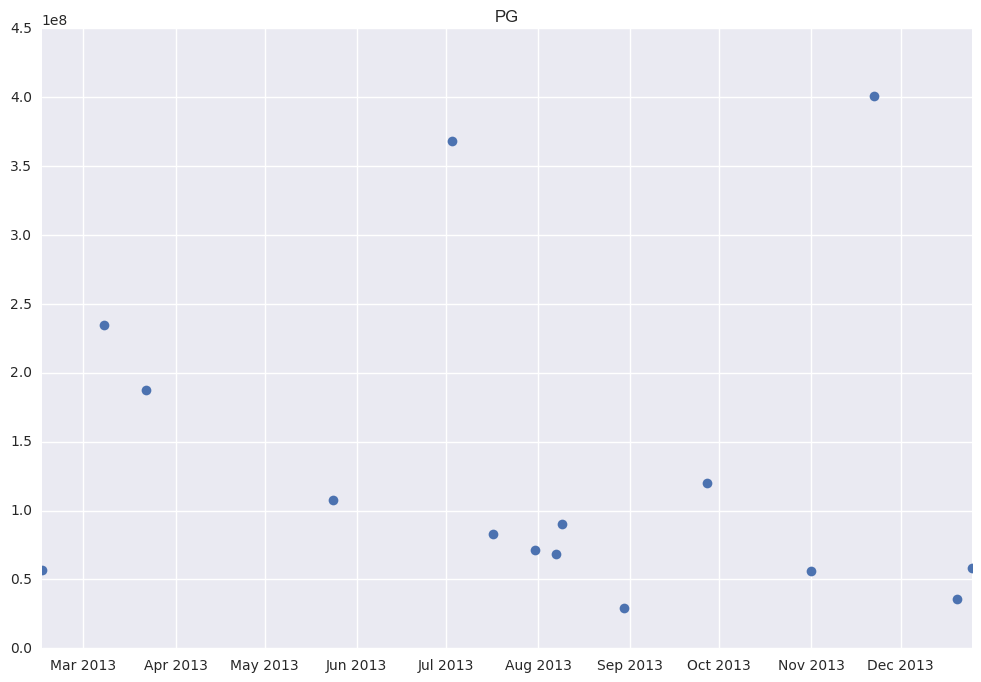

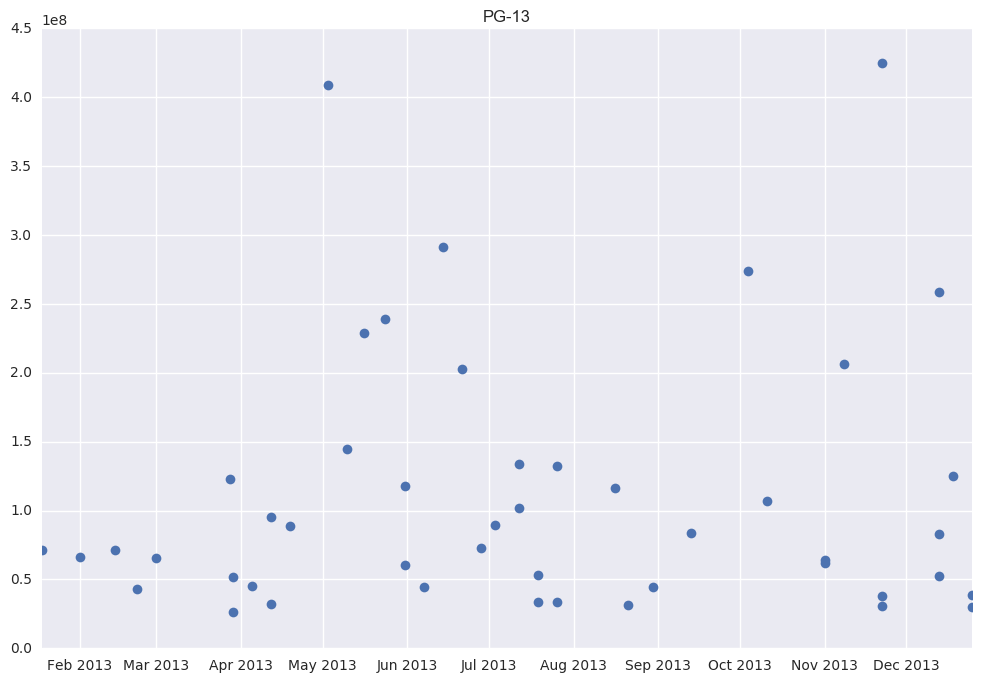

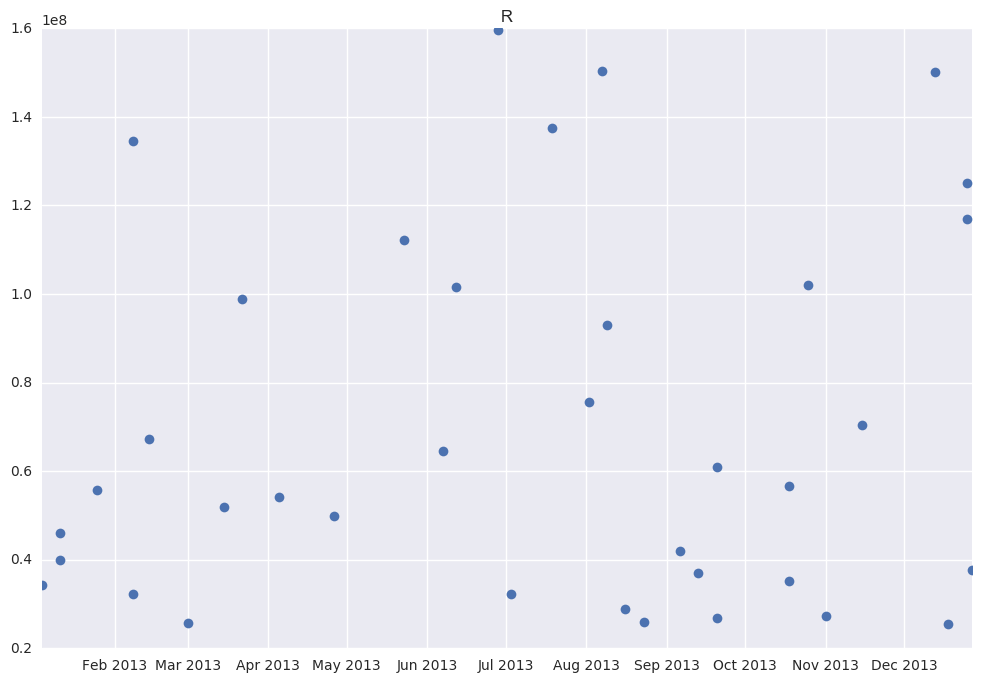

In [364]:
# Create the subplots
for i, group in df.groupby('Rating'):
    plt.figure(figsize=(12,8))
    plt.plot_date(x=group['ReleaseDate'], y=group['DomesticTotalGross'])
    plt.title(str(i))

Challenge 5

What director in your dataset has the highest gross per movie?

In [365]:
# Group by the data frame by director to get the mean and sort by domestic total gross to find out the director

df.groupby('Director').mean().sort('DomesticTotalGross', ascending=False).head()

/Users/xiangli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Budget  DomesticTotalGross  Runtime  \
Director                                                              
Francis Lawrence           130000000.0         424668047.0    146.0   
Shane Black                200000000.0         409013994.0    129.0   
Chris BuckJennifer Lee     150000000.0         400738009.0    108.0   
Pierre CoffinChris Renaud   76000000.0         368061265.0     98.0   
Zack Snyder                225000000.0         291045518.0    143.0   

                           ReleaseMonth  
Director                                 
Francis Lawrence                   11.0  
Shane Black                         5.0  
Chris BuckJennifer Lee             11.0  
Pierre CoffinChris Renaud           7.0  
Zack Snyder                         6.0

Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [366]:
# Create a dataframe for mean and std of domestic total gross by month

mean = df.groupby('ReleaseMonth')['DomesticTotalGross'].mean()
std = df.groupby('ReleaseMonth')['DomesticTotalGross'].std()

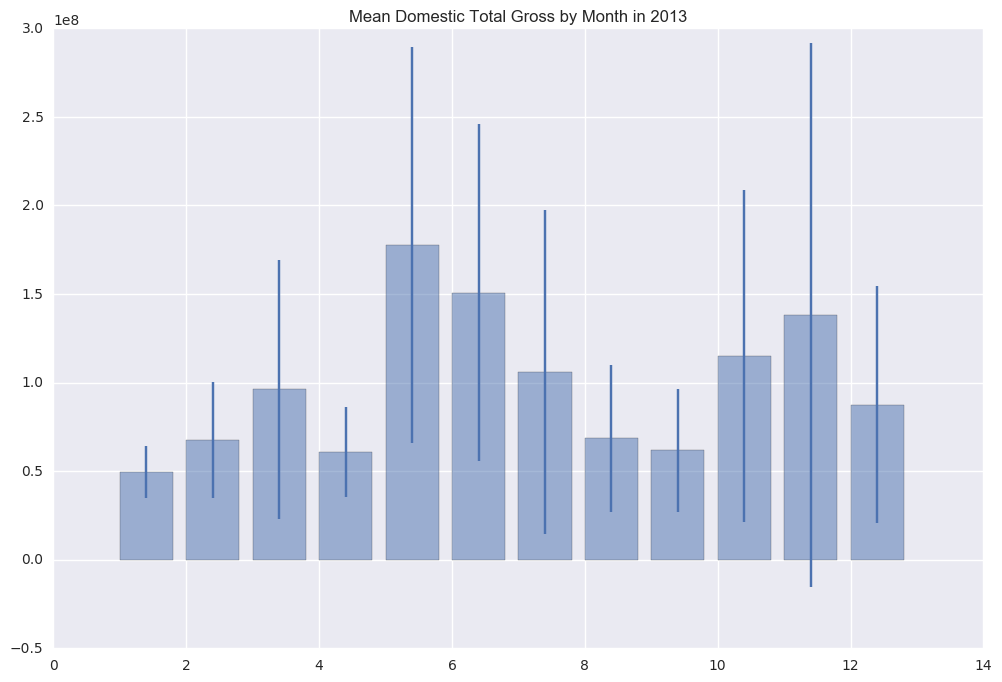

In [367]:
# Plot the bar graph for mean domestic total gross by month including the error bars

plt.figure(figsize=(12,8))
plt.bar(mean.index, mean, yerr=std,alpha=0.5)
plt.title('Mean Domestic Total Gross by Month in 2013')